In [188]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report


In [189]:
# Import the dataset
df = pd.read_csv("../input/heart-attack-analysis-prediction-dataset/heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Description

* **Age** : Age of the patient

* **Sex** : Sex of the patient

* **exang**: exercise induced angina (1 = yes; 0 = no)

* **ca** : number of major vessels (0-3)

* **cp** : Chest Pain type chest pain type

    * Value 1: typical angina
    * Value 2: atypical angina
    * Value 3: non-anginal pain
    * Value 4: asymptomatic
* **trtbps** : resting blood pressure (in mm Hg)

* **chol** : cholestoral in mg/dl fetched via BMI sensor

* **fbs** : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
 
* **rest_ecg** : resting electrocardiographic results

    *     Value 0: normal
    *     Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    *     Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach** : maximum heart rate achieved

* **output** : 0= less chance of heart attack 1= more chance of heart attack

In [190]:
# Check any null values
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [191]:
# Check the value counts for output
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

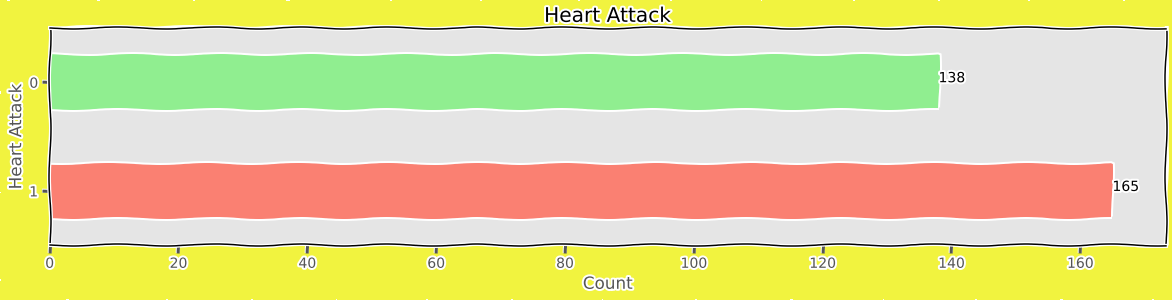

In [192]:
# visualize it
with plt.xkcd():
    plt.figure(figsize=(20,4), facecolor='#f1f33f')
    df.output.value_counts().plot(kind='barh', color=['salmon', 'lightgreen'])
    plt.title("Output Value Counts")
    plt.xlabel("Count")
    plt.ylabel("Heart Attack")
    
    num = df.output.value_counts()
    
    for index, count in enumerate(num):
           plt.text(count, index,
                     str(count))
    plt.title("Heart Attack")

In [193]:
# Gender
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

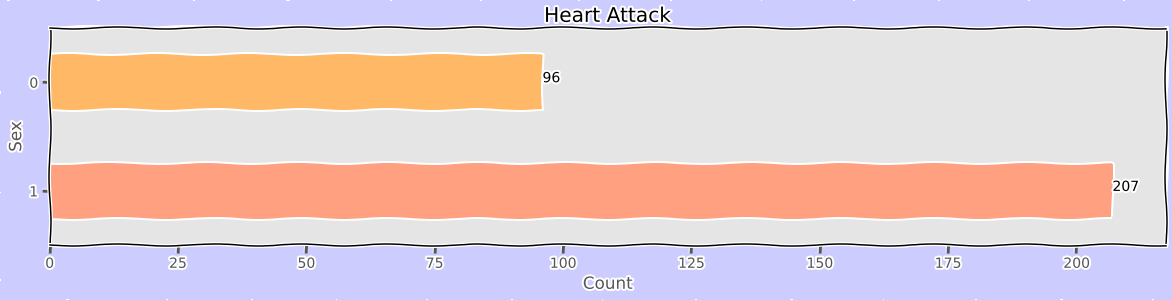

In [194]:
# visualize it
with plt.xkcd():
    plt.figure(figsize=(20,4), facecolor='#ccccff')
    df.sex.value_counts().plot(kind='barh', color=['#ffa180', '#ffb865'])
    plt.xlabel("Count")
    plt.ylabel("Sex")
    
    num = df.sex.value_counts()
    
    for index, count in enumerate(num):
           plt.text(count, index,
                     str(count))
    plt.title("Heart Attack")

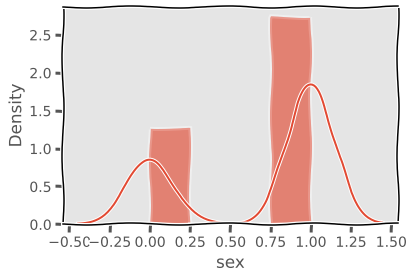

In [195]:
with plt.xkcd():
    sns.distplot(df['sex'])

<Figure size 720x360 with 0 Axes>

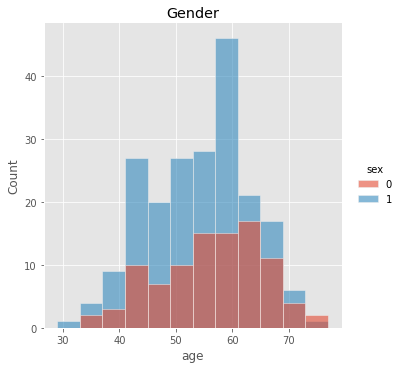

In [196]:

plt.figure(figsize=(10,5))
sns.displot(x='age', hue='sex', data=df, alpha=0.6)
plt.title("Gender")
plt.show()

<Figure size 720x360 with 0 Axes>

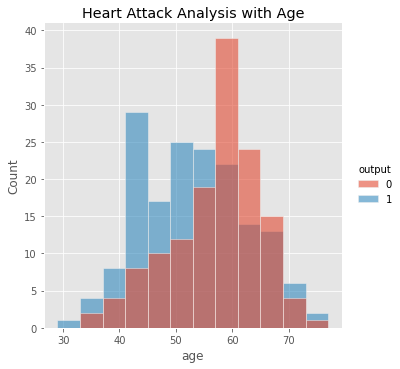

In [197]:
# plot age with heart attack

plt.figure(figsize=(10,5))
sns.displot(x='age', hue='output', data=df, alpha=0.6)
plt.title("Heart Attack Analysis with Age")
plt.show()

<Figure size 720x360 with 0 Axes>

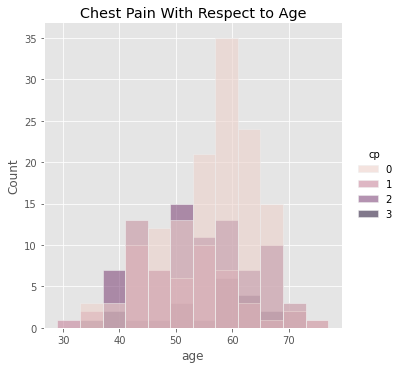

In [198]:
# which age group people has more chest pain

plt.figure(figsize=(10,5))
sns.displot(x='age',hue='cp',data=df,alpha=0.6)
plt.title("Chest Pain With Respect to Age")
plt.show()

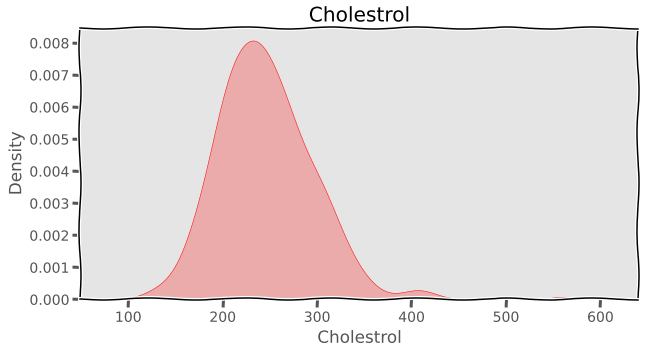

In [199]:
# Cholestrol
with plt.xkcd():
    plt.figure(figsize=(10,5))
    sns.kdeplot(data=df['chol'],shade=True,color='red')
    plt.xlabel("Cholestrol")
    plt.title("Cholestrol")


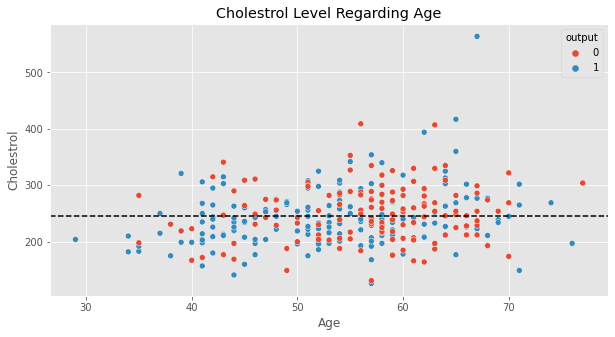

In [200]:

plt.figure(figsize=(10,5))
sns.scatterplot( df['age'],df['chol'], hue=df['output'])
plt.xlabel("Age",)
plt.ylabel("Cholestrol")
plt.title("Cholestrol Level Regarding Age")
plt.axhline(df['chol'].mean(), linestyle='--', color='black')
plt.grid(True)
plt.style.use("ggplot")

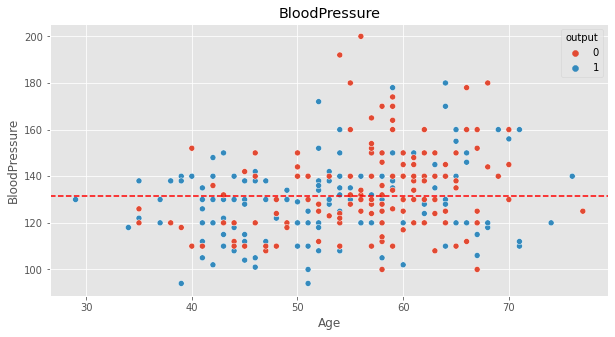

In [201]:
plt.figure(figsize=(10,5))
sns.scatterplot( df['age'],df['trtbps'], hue=df['output'])
plt.xlabel("Age",)
plt.ylabel("BloodPressure")
plt.title("BloodPressure")
plt.axhline(df['trtbps'].mean(), linestyle='--', color='red')
plt.grid(True)
plt.style.use("ggplot")


Text(0.5, 1.0, 'Cholestrol with Fasting Blood Sugar')

<Figure size 720x360 with 0 Axes>

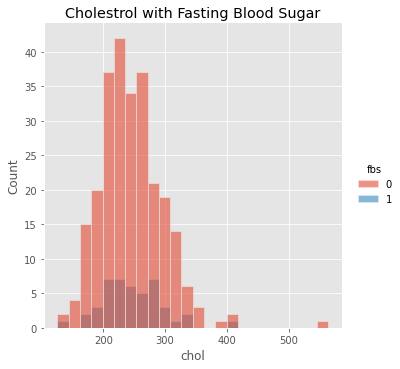

In [202]:
plt.figure(figsize=(10,5))
sns.displot(x='chol',hue='fbs',data=df,alpha=0.6)
plt.title("Cholestrol with Fasting Blood Sugar")

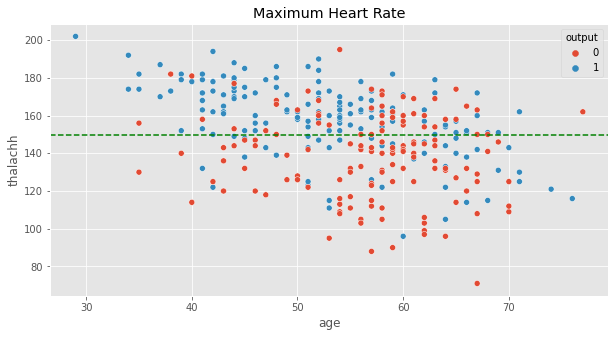

In [203]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['age'],df['thalachh'],hue=df['output'])
plt.title("Maximum Heart Rate")
plt.axhline(df['thalachh'].mean(), linestyle='--', color='green')

Text(0.5, 1.0, 'Histogram ')

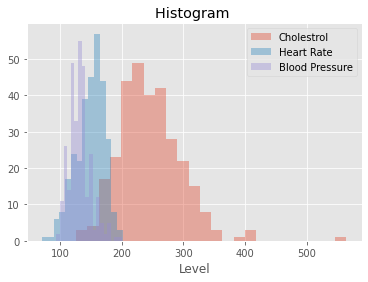

In [204]:
# Histogram
sns.distplot(a=df['chol'], label='Cholestrol', kde=False)
sns.distplot(a=df['thalachh'], label='Heart Rate', kde=False)
sns.distplot(a=df['trtbps'], label='Blood Pressure', kde=False)

plt.legend()
plt.xlabel("Level")
plt.title("Histogram ")

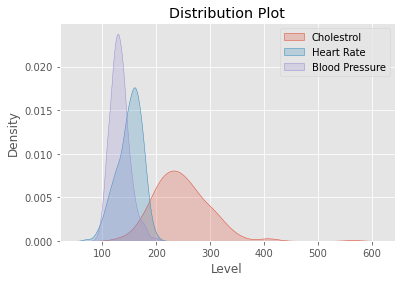

In [205]:
# KDE plots

sns.kdeplot(data=df['chol'], label='Cholestrol', shade=True)
sns.kdeplot(data=df['thalachh'], label='Heart Rate', shade=True)
sns.kdeplot(data=df['trtbps'], label='Blood Pressure', shade=True)
plt.title("Distribution Plot")
plt.xlabel("Level")

plt.legend()

Text(0.5, 1.0, 'Total Column Plot')

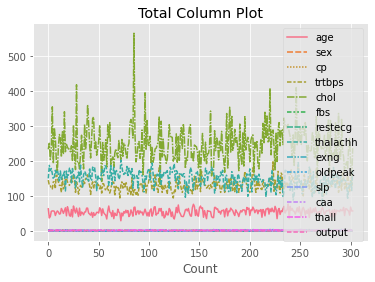

In [206]:
sns.lineplot(data=df)
plt.xlabel("Count")
plt.title("Total Column Plot")

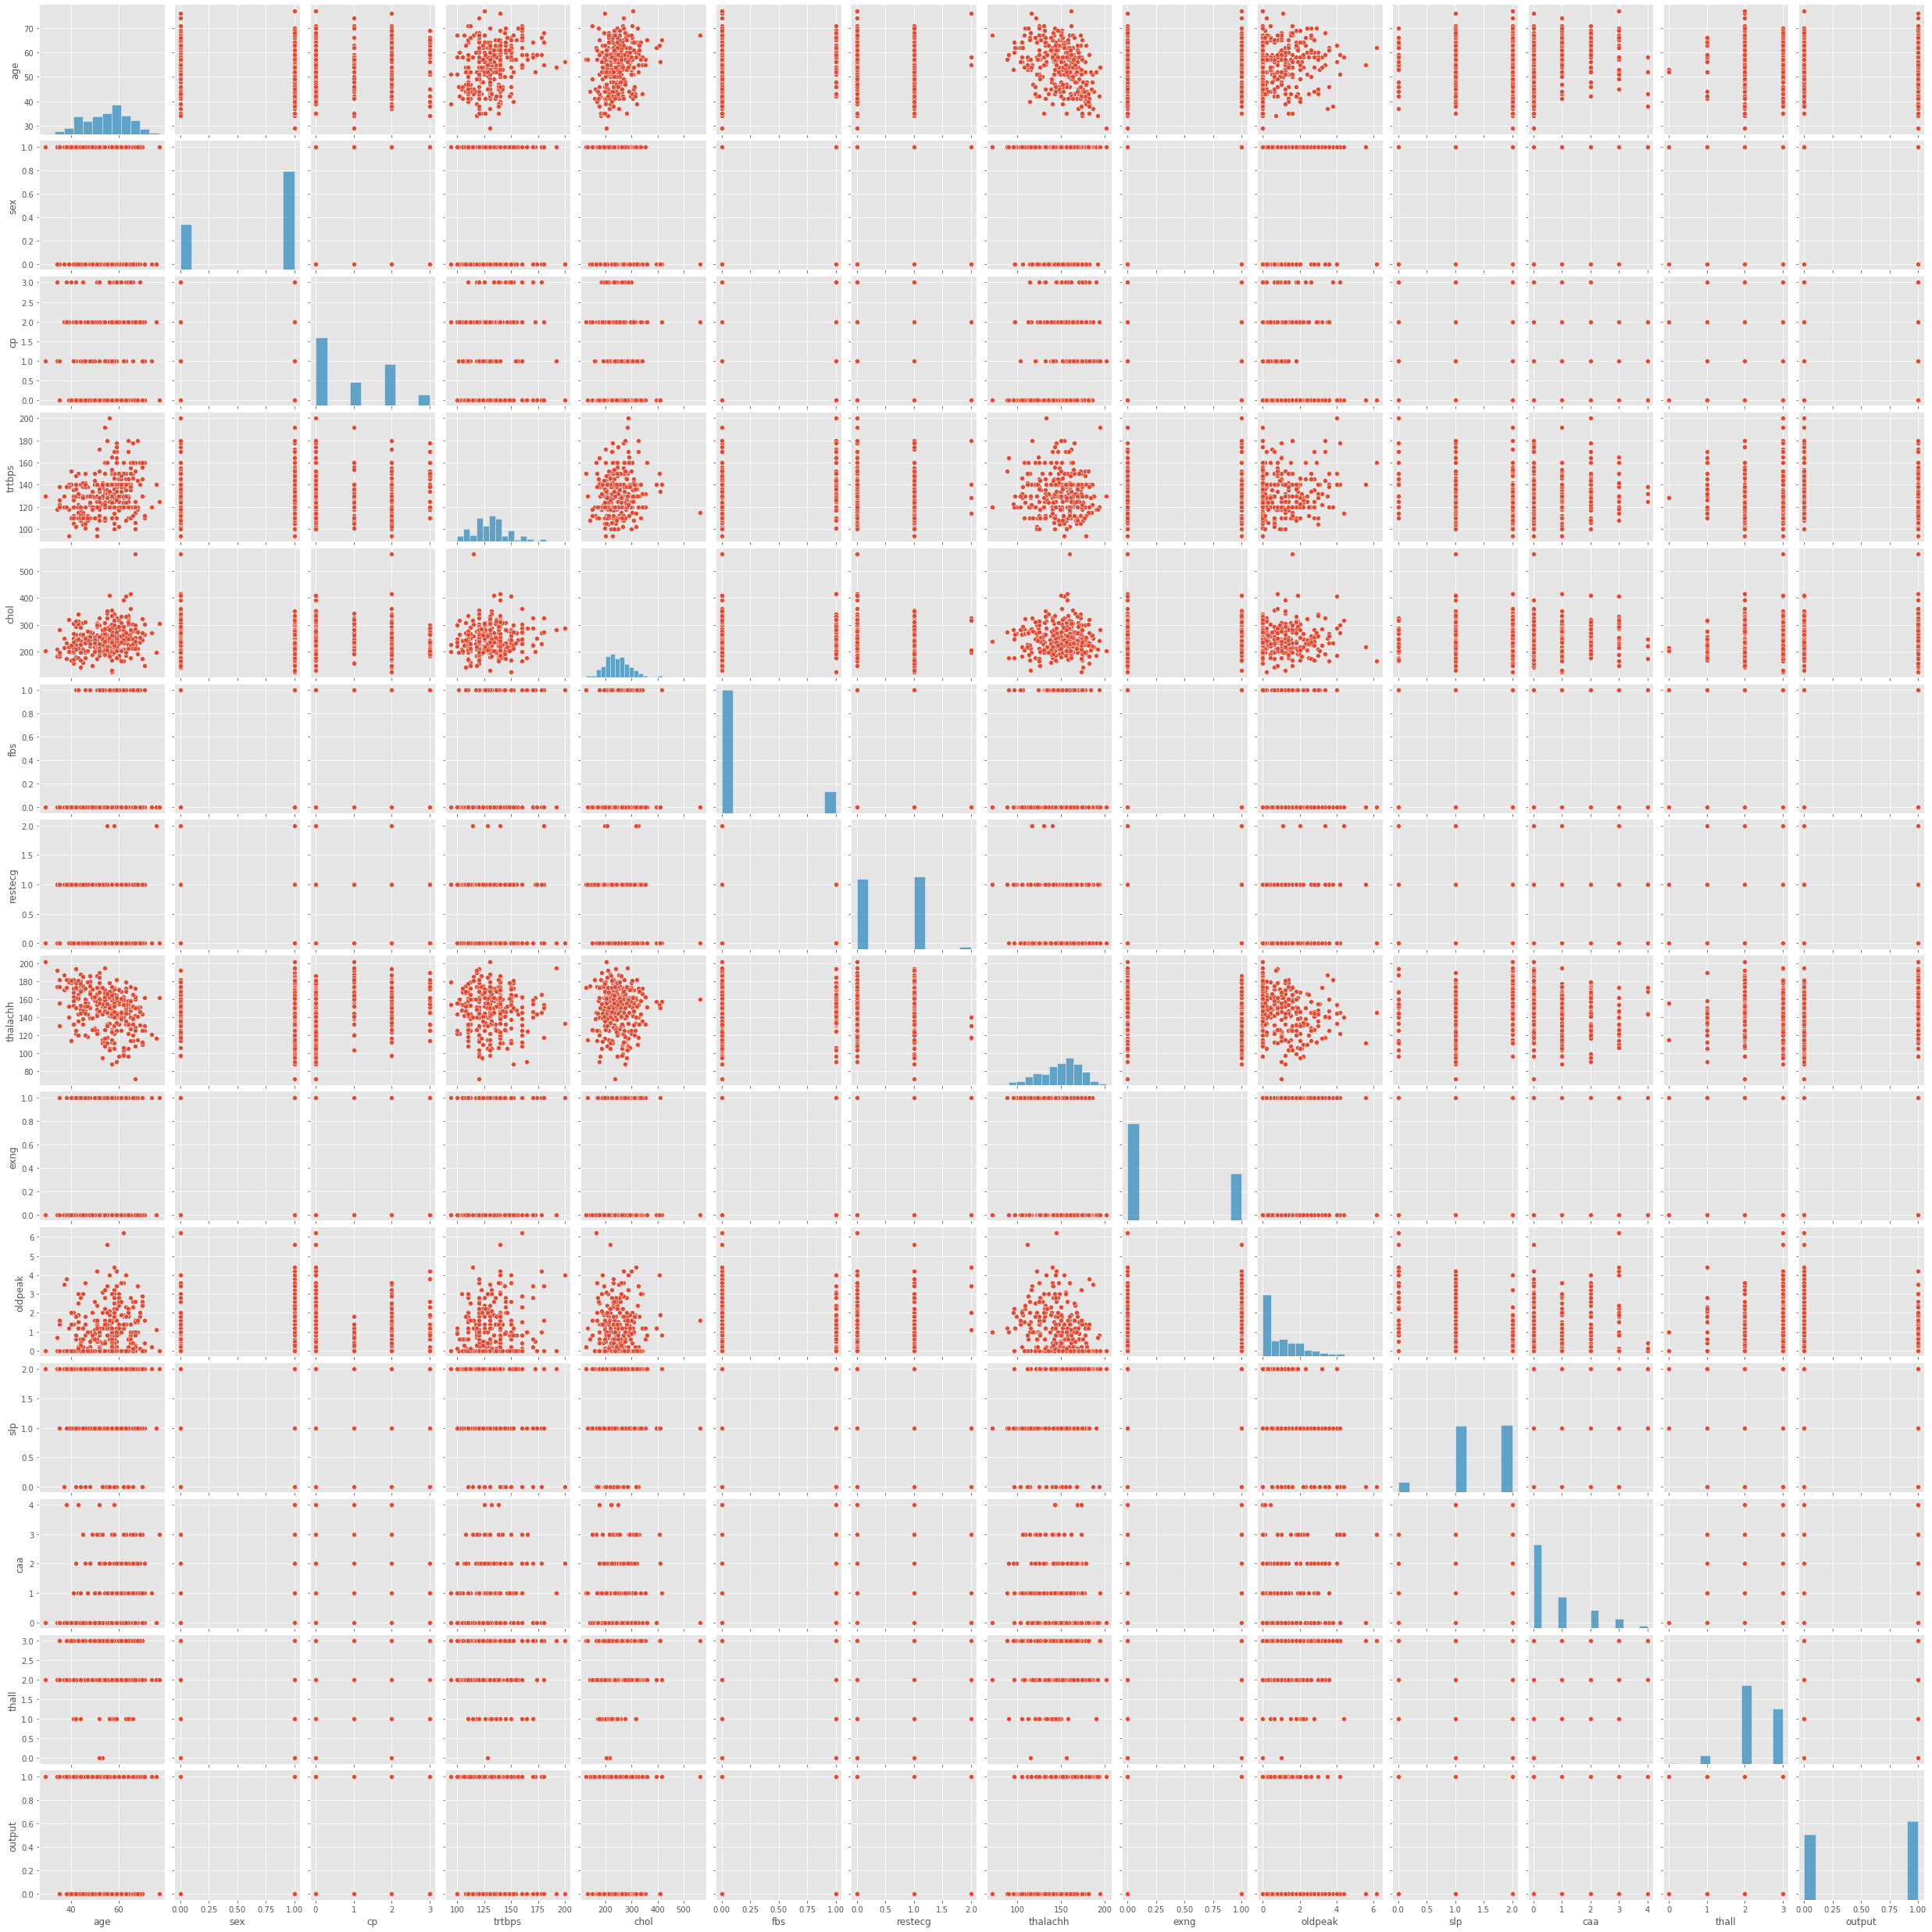

In [207]:
sns.pairplot(data=df)

Text(0.5, 1.0, 'Correlation')

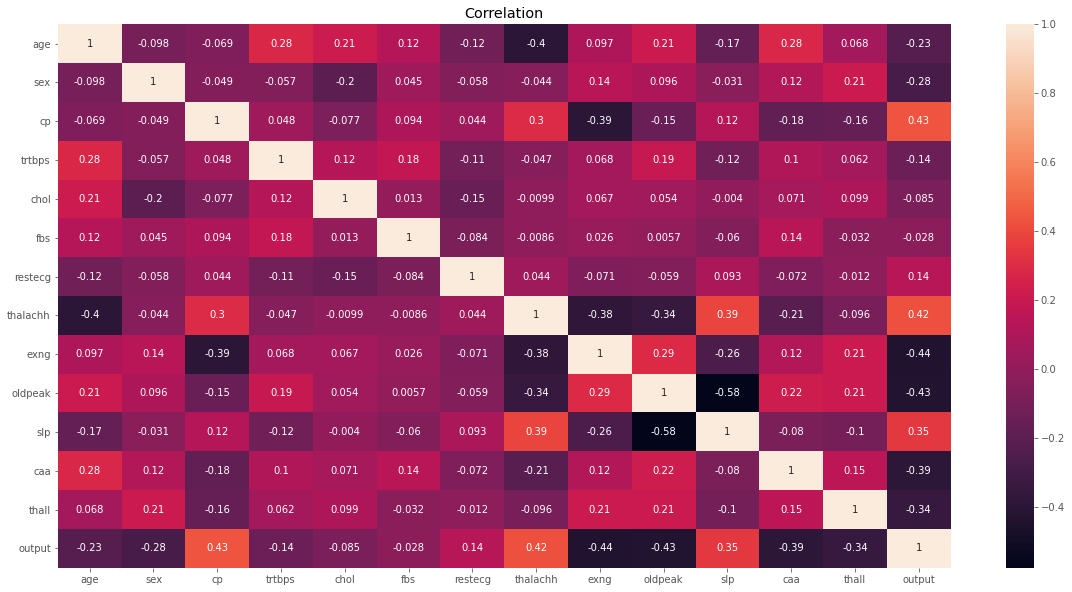

In [208]:
## Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.title("Correlation")

In [209]:
# our dataset is imbalanced, balance it using SMOTE
from imblearn.over_sampling import SMOTE
from collections import Counter

# split the dataset
X = df.drop("output", axis=1)
y = df['output']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print("----Imbalanced Dataset----")
counter = Counter(y)
print(counter)

# transform the dataset
over = SMOTE()
X, y = over.fit_resample(X, y)

print("---Balanced Dataset----")
counter = Counter(y)
print(counter)

----Imbalanced Dataset----
Counter({1: 165, 0: 138})
---Balanced Dataset----
Counter({1: 165, 0: 165})


## Modelling

In [210]:
## RandomForestClassifer
np.random.seed(42)
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)
y_preds1 = model1.predict(X_test)
cv = cross_val_score(model1,X,y, cv=5, scoring='accuracy')
score = np.mean(cv)
score

0.806060606060606

In [211]:
# GradientBoosting Classifier
np.random.seed(42)
model2 = GradientBoostingClassifier()
model2.fit(X_train, y_train)
y_preds2 = model2.predict(X_test)
cv = cross_val_score(model2,X,y, cv=5, scoring='accuracy')
score = np.mean(cv)
score

0.7878787878787878

In [212]:
# DecisionTreeClassifier
np.random.seed(42)
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
y_preds3 = model3.predict(X_test)
cv = cross_val_score(model3,X,y, cv=5, scoring='accuracy')
score = np.mean(cv)
score

0.7575757575757575

In [213]:
#KNN
np.random.seed(42)
model4 = KNeighborsClassifier()
model4.fit(X_train, y_train)
y_preds4 = model4.predict(X_test)
cv = cross_val_score(model4,X,y, cv=5, scoring='accuracy')
score = np.mean(cv)
score

0.6151515151515151

In [214]:
#LogisticRegression
np.random.seed(42)
model5 = LogisticRegression()
model5.fit(X_train, y_train)
y_preds5 = model5.predict(X_test)
cv = cross_val_score(model5,X,y, cv=5, scoring='accuracy')
score = np.mean(cv)
score

0.809090909090909

In [215]:
# GaussianNB
np.random.seed(42)
model6 = GaussianNB()
model6.fit(X_train, y_train)
y_preds6 = model6.predict(X_test)
cv = cross_val_score(model6,X,y, cv=5, scoring='accuracy')
score = np.mean(cv)
score

0.793939393939394

In [216]:
# SGD
np.random.seed(42)
model7 = SGDClassifier()
model7.fit(X_train, y_train)
y_preds7 = model7.predict(X_test)
cv = cross_val_score(model7,X,y, cv=5, scoring='accuracy')
score = np.mean(cv)
score

0.6303030303030303

In [217]:
# CatBoost
np.random.seed(42)
model8 = CatBoostClassifier(verbose=0)
model8.fit(X_train, y_train)
y_preds8 = model8.predict(X_test)
cv = cross_val_score(model8,X,y, cv=5, scoring='accuracy')
score = np.mean(cv)
score

0.803030303030303

In [218]:
# XGb
np.random.seed(42)
model9 = XGBClassifier()
model9.fit(X_train, y_train)
y_pred9 = model9.predict(X_test)
cv = cross_val_score(model9,X,y, cv=5, scoring='accuracy')
score = np.mean(cv)
score

[07:21:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:21:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:21:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[07:21:47] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.7878787878787878

In [219]:
# LGBM
np.random.seed(42)
model10 = LGBMClassifier()
model10.fit(X_train, y_train)
y_preds10 = model10.predict(X_test)
cv = cross_val_score(model4,X,y, cv=5, scoring='accuracy')
score = np.mean(cv)
score

0.6151515151515151

## Evaluation Metrics

Precision score: 0.8787878787878788
Recall Score : 0.90625
F1 Score : 0.8923076923076922

-------------Classification Report_________
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61




Text(33.0, 0.5, 'True Label')

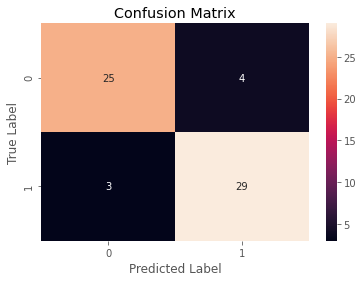

In [221]:
# metrics with best performed model
print(f"Precision score: {precision_score(y_test, y_preds5)}")
print(f"Recall Score : { recall_score(y_test, y_preds5)}")
print(f"F1 Score : {f1_score(y_test, y_preds5)}")
print()
print("-------------Classification Report_________")
print(classification_report(y_test, y_preds5))
print()
sns.heatmap(confusion_matrix(y_test, y_preds5), annot=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

## Hyperparameter Tuning

In [224]:
grid = {"penalty": ['l2' ,'elasticnet'],
       "C" : [0.001,0.01,0.1,1.0],
       'solver':['liblinear', 'saga'],
       'multi_class':['ovr','multinomial']}

randomized = RandomizedSearchCV(estimator=LogisticRegression(),
                               param_distributions=grid,
                               n_iter=20,
                               cv=5,
                               verbose=1)
randomized.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1.0],
                                        'multi_class': ['ovr', 'multinomial'],
                                        'penalty': ['l2', 'elasticnet'],
                                        'solver': ['liblinear', 'saga']},
                   verbose=1)

In [225]:
randomized.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'multi_class': 'ovr', 'C': 1.0}

In [226]:
model = LogisticRegression(penalty='l2',
                          C=1.0,
                          solver='liblinear',
                          multi_class='ovr')
model.fit(X_train, y_train)
model.score(X_test,y_test)

0.8688524590163934

In [227]:
# Make predictions
model.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])